<a href="https://colab.research.google.com/github/pablex72/time-series-kaggle-practice/blob/main/LSTM_update_6a_trying_normalized_testing_training_NDVI_data_Forecasting_LSTM_var_length_0_7594_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import**

In [99]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**Loading the data**

In [100]:
df = pd.read_csv('/content/s2-r2-2019-2022.csv')

**Preprocessing the data**

In [101]:
df = df[['Date', 'NDVI']]
dfDate = df[['Date']]
df

,Date,NDVI
0,1/26/2019,0.708
1,2/5/2019,0.695
2,3/7/2019,0.251
3,4/6/2019,0.413
4,4/26/2019,0.267
...,...,...
120,10/2/2022,0.090
121,10/17/2022,0.082
122,11/6/2022,0.111
123,11/16/2022,0.147


In [102]:
#make date column the index
df.index = df.pop('Date')

In [103]:
testDf = df

In [104]:
df = df.values
df

array([[0.708],
       [0.695],
       [0.251],
       [0.413],
       [0.267],
       [0.503],
       [0.491],
       [0.394],
       [0.527],
       [0.505],
       [0.269],
       [0.344],
       [0.317],
       [0.308],
       [0.305],
       [0.297],
       [0.15 ],
       [0.167],
       [0.108],
       [0.159],
       [0.119],
       [0.142],
       [0.166],
       [0.126],
       [0.133],
       [0.127],
       [0.144],
       [0.153],
       [0.11 ],
       [0.109],
       [0.103],
       [0.405],
       [0.628],
       [0.371],
       [0.621],
       [0.525],
       [0.449],
       [0.409],
       [0.355],
       [0.348],
       [0.397],
       [0.392],
       [0.188],
       [0.221],
       [0.203],
       [0.205],
       [0.331],
       [0.287],
       [0.503],
       [0.5  ],
       [0.506],
       [0.495],
       [0.405],
       [0.334],
       [0.264],
       [0.169],
       [0.171],
       [0.118],
       [0.122],
       [0.137],
       [0.129],
       [0.158],
       [

In [105]:
dfDate=dfDate.values
dfDate = np.array(dfDate)
dfDate = dfDate.flatten()

# Feature length

# Normalized

In [106]:
df

# Scale the data
from sklearn.preprocessing import MinMaxScaler

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)

In [107]:
feature_length = 3

**Auxiliar Function**

Our data has to be divided into X and Y variables before we can build the model. To do so, we will write a function called Create_Features_and_Targets.



In [108]:
def Create_Features_and_Targets(data, dates, feature_length):
  
  X = list()
  Y = list()
  datesF = list()
  for i in range(len(data) - feature_length - 1):
    X.append(data[i:(i + feature_length), :])
    Y.append(data[i + feature_length, -1])
  X = np.array(X)
  Y = np.array(Y)
  datesF = np.array(dates[feature_length+1:])
  return datesF, X, Y

In [109]:
dates, X, y = Create_Features_and_Targets(df,dfDate, feature_length)
dates.shape, X.shape, y.shape
X

array([[[0.85471204],
        [0.83769634],
        [0.2565445 ]],

       [[0.83769634],
        [0.2565445 ],
        [0.46858639]],

       [[0.2565445 ],
        [0.46858639],
        [0.27748691]],

       [[0.46858639],
        [0.27748691],
        [0.58638743]],

       [[0.27748691],
        [0.58638743],
        [0.57068063]],

       [[0.58638743],
        [0.57068063],
        [0.44371728]],

       [[0.57068063],
        [0.44371728],
        [0.61780105]],

       [[0.44371728],
        [0.61780105],
        [0.58900524]],

       [[0.61780105],
        [0.58900524],
        [0.28010471]],

       [[0.58900524],
        [0.28010471],
        [0.37827225]],

       [[0.28010471],
        [0.37827225],
        [0.34293194]],

       [[0.37827225],
        [0.34293194],
        [0.33115183]],

       [[0.34293194],
        [0.33115183],
        [0.32722513]],

       [[0.33115183],
        [0.32722513],
        [0.31675393]],

       [[0.32722513],
        [0.31675393],
    

# Splitting

In [110]:
q_80 = int(len(dates) * .8)
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
X_train

array([[[0.85471204],
        [0.83769634],
        [0.2565445 ]],

       [[0.83769634],
        [0.2565445 ],
        [0.46858639]],

       [[0.2565445 ],
        [0.46858639],
        [0.27748691]],

       [[0.46858639],
        [0.27748691],
        [0.58638743]],

       [[0.27748691],
        [0.58638743],
        [0.57068063]],

       [[0.58638743],
        [0.57068063],
        [0.44371728]],

       [[0.57068063],
        [0.44371728],
        [0.61780105]],

       [[0.44371728],
        [0.61780105],
        [0.58900524]],

       [[0.61780105],
        [0.58900524],
        [0.28010471]],

       [[0.58900524],
        [0.28010471],
        [0.37827225]],

       [[0.28010471],
        [0.37827225],
        [0.34293194]],

       [[0.37827225],
        [0.34293194],
        [0.33115183]],

       [[0.34293194],
        [0.33115183],
        [0.32722513]],

       [[0.33115183],
        [0.32722513],
        [0.31675393]],

       [[0.32722513],
        [0.31675393],
    

In [111]:
dates_test, X_test, y_test = dates[q_80:], X[q_80:], y[q_80:]

# Plotting data

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120],
 [Text(0, 0, '4/26/2019'),
  Text(1, 0, '5/16/2019'),
  Text(2, 0, '5/26/2019'),
  Text(3, 0, '5/31/2019'),
  Text(4, 0, '6/5/2019'),
  Text(5, 0, '6/10/2019'),
  Text(6, 0, '6/15/2019'),
  Text(7, 0, '6/20/2019'),
  Text(8, 0, '6/30/2019'),
  Text(9, 0, '7/10/2

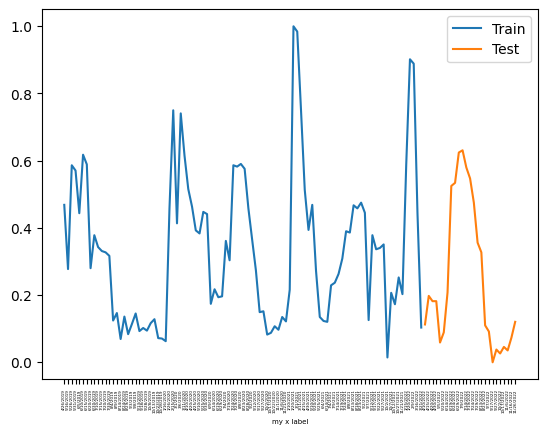

In [112]:
plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)
plt.legend(['Train', 'Test'])
plt.xticks(rotation=90)
plt.xlabel('my x label', size = 5)
plt.xticks(size = 3)

# Model Creation

In [113]:
# Create the model by importing the required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

Adam will be used as an optimizer for the LSTM model we will create which consists of two LSTM layers, two dropout layers, and one dense layer.

In [114]:
from keras.optimizers import Adam

# Define the optimizer with a lower learning rate
adam = Adam(lr=0.001)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Sequential

In [115]:
# LSTMs are recurrent neural networks (RNNs). In simple terms, LSTMs work by allowing the network to remember 
# the context of the model while forgetting the irrelevant information.
model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.6),
    LSTM(64, return_sequences=True),    
    Dropout(0.6),
    LSTM(128, return_sequences=False),
    Dense(1),
])
model.compile(optimizer=adam, loss="mean_squared_error")
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 3, 256)            264192    
                                                                 
 dropout_8 (Dropout)         (None, 3, 256)            0         
                                                                 
 lstm_13 (LSTM)              (None, 3, 64)             82176     
                                                                 
 dropout_9 (Dropout)         (None, 3, 64)             0         
                                                                 
 lstm_14 (LSTM)              (None, 128)               98816     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 445,313
Trainable params: 445,313
Non-tr

Using the model.fit function, we can now train the model. Our model will be trained using a batch_size of 12 under 100 epochs.

# Fit

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs = 1000,
    batch_size = 12,
    verbose = 0,
)

# Predicting

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [ ]:
from sklearn.metrics import r2_score
print("LSTM coefficient of determination of the prediction: ", r2_score(y_train, model.predict(X_train)))

# Testing

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
#plt.legend(['Training Predictions', 
#            'Training Observations',
#            'Validation Predictions', 
#            'Validation Observations',
#            'Testing Predictions', 
#            'Testing Observations'])

# r2

In [ ]:
from sklearn.metrics import r2_score
print("LSTM coefficient of determination of the prediction: ", r2_score(y_test, model.predict(X_test)))

# r2, rmse, mae, mse

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate predicted values
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred, squared=True)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("LSTM R^2 score: ", r2)
print("LSTM Root Mean Squared Error (RMSE): ", rmse)
print("LSTM Mean Squared Error (MSE): ", mse)
print("LSTM Mean Absolute Error (MAE): ", mae)